In [1]:
import os
import pandas as pd
import numpy as np
# Get project root directory
projekt_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Set the cleaned data directory path
cleaned_data_dir = os.path.join(projekt_root, "cleaned_data")

# Define file paths for all datasets
file_paths = {
    "global_ai_ml_salaries": os.path.join(cleaned_data_dir, "cleaned_global_ai_ml_data_salaries.csv"),
    "global_salaries": os.path.join(cleaned_data_dir, "cleaned_global-salaries-in-ai-ml-data-science.csv"),
    "jobs_2024": os.path.join(cleaned_data_dir, "cleaned_jobs_in_data_2024.csv"),
    "data_science_salaries": os.path.join(cleaned_data_dir, "cleaned_data_science_salaries.csv")
}

### load data

In [2]:
# Load all datasets
datasets = {}
for name, path in file_paths.items():
    try:
        datasets[name] = pd.read_csv(path)
        print(f"Loaded dataset: {name}")
    except Exception as e:
        print(f"Error loading {name}: {e}")

target_variable = "salary_in_usd"

Loaded dataset: global_ai_ml_salaries
Loaded dataset: global_salaries
Loaded dataset: jobs_2024
Loaded dataset: data_science_salaries


In [3]:
# Process datasets
processed_datasets = {}
for name, df in datasets.items():
    # Ensure the dataset contains the required features
    available_features = [col for col in df.columns if col in ["work_year", "experience_level", "employment_type", "company_size", "job_title"]]

    if "job_title" in df.columns:
        # Encode job_title
        from sklearn.preprocessing import LabelEncoder
        job_title_encoder = LabelEncoder()
        df["job_title_encoded"] = job_title_encoder.fit_transform(df["job_title"])
        available_features.remove("job_title")  # Remove the original text column
        available_features.append("job_title_encoded")  # Replace with the numerical column

    if target_variable in df.columns:
        processed_datasets[name] = df[available_features + [target_variable]]
        print(f"Processed dataset: {name} (Columns: {available_features + [target_variable]})")
    else:
        print(f"Skipped dataset: {name} (Target variable not found)")

Processed dataset: global_ai_ml_salaries (Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd'])
Processed dataset: global_salaries (Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd'])
Processed dataset: jobs_2024 (Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd'])
Processed dataset: data_science_salaries (Columns: ['experience_level', 'employment_type', 'work_year', 'company_size', 'job_title_encoded', 'salary_in_usd'])


### process job_title

In [4]:

for name, df in processed_datasets.items():
    print(f"\nDataset: {name}")
    print("Columns and Data Types:")
    print(df.dtypes)
    print("\nUnique Values for Categorical Columns:")
    for col in df.columns:
        if df[col].dtype == "object": 
            print(f"  {col}: {df[col].unique()}")


Dataset: global_ai_ml_salaries
Columns and Data Types:
work_year             int64
experience_level     object
employment_type      object
company_size         object
job_title_encoded     int32
salary_in_usd         int64
dtype: object

Unique Values for Categorical Columns:
  experience_level: ['SE' 'MI' 'EN' 'EX']
  employment_type: ['FT' 'PT' 'CT' 'FL']
  company_size: ['M' 'L' 'S']

Dataset: global_salaries
Columns and Data Types:
work_year             int64
experience_level     object
employment_type      object
company_size         object
job_title_encoded     int32
salary_in_usd         int64
dtype: object

Unique Values for Categorical Columns:
  experience_level: ['MI' 'EN' 'SE' 'EX']
  employment_type: ['FT' 'PT' 'CT' 'FL']
  company_size: ['M' 'L' 'S']

Dataset: jobs_2024
Columns and Data Types:
work_year             int64
experience_level     object
employment_type      object
company_size         object
job_title_encoded     int32
salary_in_usd         int64
dtype: objec

In [5]:

for name, df in processed_datasets.items():
    if target_variable in df.columns:
        print(f"Dataset {name} contains target variable: {target_variable}")
    elif "SalaryUSD" in df.columns:
        print(f"Dataset {name} contains alternative target variable: SalaryUSD")
    else:
        print(f"Dataset {name} does not contain the target variable.")

Dataset global_ai_ml_salaries contains target variable: salary_in_usd
Dataset global_salaries contains target variable: salary_in_usd
Dataset jobs_2024 contains target variable: salary_in_usd
Dataset data_science_salaries contains target variable: salary_in_usd


In [6]:

for name, df in processed_datasets.items():
    print(f"\nDataset: {name}")
    print("Columns:", df.columns.tolist())


Dataset: global_ai_ml_salaries
Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd']

Dataset: global_salaries
Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd']

Dataset: jobs_2024
Columns: ['work_year', 'experience_level', 'employment_type', 'company_size', 'job_title_encoded', 'salary_in_usd']

Dataset: data_science_salaries
Columns: ['experience_level', 'employment_type', 'work_year', 'company_size', 'job_title_encoded', 'salary_in_usd']


In [7]:
# combine the data
combined_data = pd.concat(processed_datasets.values(), ignore_index=True)


print(combined_data.head())

# combined_data = combined_data.query("work_year != 2020")


   work_year experience_level employment_type company_size  job_title_encoded  \
0       2024               SE              FT            M                 74   
1       2024               SE              FT            M                 74   
2       2024               MI              FT            M                150   
3       2024               MI              FT            M                150   
4       2024               SE              FT            M                155   

   salary_in_usd  
0         170955  
1         130270  
2          92144  
3          57616  
4         201600  


             Feature  Importance
4  job_title_encoded    0.608114
1   experience_level    0.280735
0          work_year    0.055456
3       company_size    0.042385
2    employment_type    0.013310


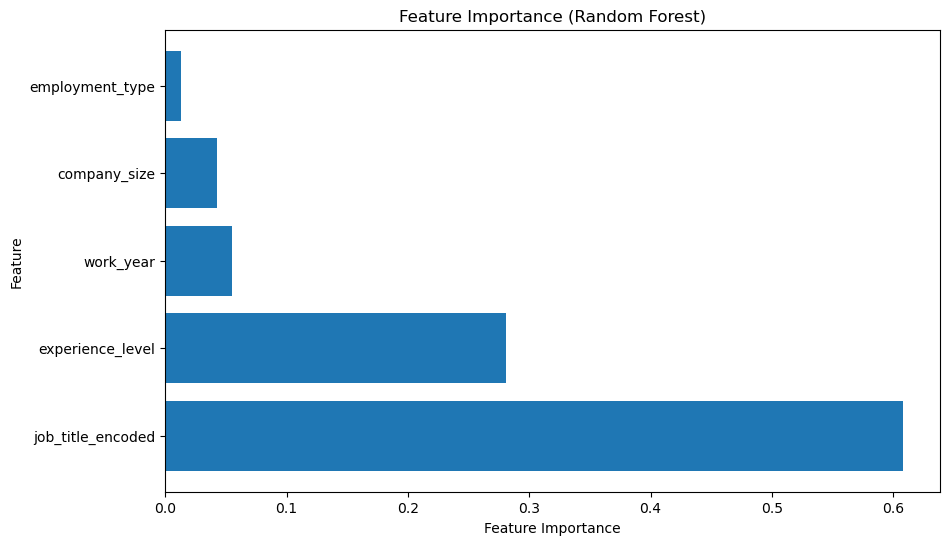

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
X = combined_data.drop(columns=["salary_in_usd"])  # Features
y = combined_data["salary_in_usd"]                # Target variable

# Apply Label Encoding to categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ["experience_level", "employment_type", "company_size"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the most important features
print(importance_df)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Retain important features
selected_features = ["job_title_encoded", "experience_level", "work_year", "company_size"]
X_selected = combined_data[selected_features].copy()  # Explicitly create a copy

# Create a new feature: interaction between job_title_encoded and experience_level
X_selected.loc[:, "job_exp_interaction"] = X_selected["job_title_encoded"].astype(str) + "_" + X_selected["experience_level"].astype(str)

# Apply Label Encoding to the interaction feature
le = LabelEncoder()
X_selected.loc[:, "job_exp_interaction"] = le.fit_transform(X_selected["job_exp_interaction"])

# Apply log transformation to the target variable
y_log = np.log1p(combined_data["salary_in_usd"])  # Use log1p to avoid negative log values

In [10]:
# define category features
categorical_features = ["experience_level", "company_size", "job_exp_interaction"]
numerical_features = ["job_title_encoded", "work_year"]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_log, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Create a feature engineering pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),  # Pass through numerical features unchanged
        ("cat", encoder, categorical_features)       # Apply OneHotEncoder to categorical features
    ]
)

# Apply feature engineering to the training and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### random forest


In [12]:
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
def train_random_forest(X_train, y_train, X_test, y_test):
    start_time = time.time()
    rf_model = RandomForestRegressor(random_state=42,n_jobs=3)
    rf_model.fit(X_train, y_train)


    y_pred_rf = rf_model.predict(X_test)

    end_time = time.time()
    total_time = end_time - start_time
    
    y_test_actual = np.expm1(y_test) 
    y_pred_rf_actual = np.expm1(y_pred_rf) 

    mae_rf = mean_absolute_error(y_test_actual, y_pred_rf_actual)
    mse_rf = mean_squared_error(y_test_actual, y_pred_rf_actual)
    r2_rf = r2_score(y_test_actual, y_pred_rf_actual)

    print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
    print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
    print(f"Random Forest - R-squared (R²): {r2_rf}")
    print(f"Total Execution Time: {total_time:.4f} seconds")

    return rf_model, y_pred_rf_actual,total_time

### LightGBM 

In [13]:
import lightgbm as lgb

def train_lightgbm(X_train, y_train, X_test, y_test):
    lgb_model = lgb.LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)

    y_pred_lgb = lgb_model.predict(X_test)


    y_test_actual = np.expm1(y_test)  
    y_pred_lgb_actual = np.expm1(y_pred_lgb) 

    mae_lgb = mean_absolute_error(y_test_actual, y_pred_lgb_actual)
    mse_lgb = mean_squared_error(y_test_actual, y_pred_lgb_actual)
    r2_lgb = r2_score(y_test_actual, y_pred_lgb_actual)

    print(f"LightGBM - Mean Absolute Error (MAE): {mae_lgb}")
    print(f"LightGBM - Mean Squared Error (MSE): {mse_lgb}")
    print(f"LightGBM - R-squared (R²): {r2_lgb}")

    return lgb_model, y_pred_lgb_actual


# Optimized LightGBM training function
def train_optimized_lightgbm(X_train, y_train, X_test, y_test):
    # Define the hyperparameter grid
    param_grid = {
        "num_leaves": [31, 63, 127],  # Number of leaf nodes
        "learning_rate": [0.01, 0.05, 0.1],  # Learning rate
        "n_estimators": [100, 200, 300],  # Number of trees
    }

    lgb_model = lgb.LGBMRegressor(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=lgb_model,  # Model to use
        param_grid=param_grid,  # Hyperparameter grid
        cv=3,  # Number of cross-validation folds
        scoring="r2",  # Evaluation metric (R²)
        n_jobs=-1  # Use all available CPU cores
    )

    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best parameters:", grid_search.best_params_)

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred_lgb_optimized = best_model.predict(X_test)

    # Inverse transform the predicted and actual values
    y_test_actual = np.expm1(y_test) 
    y_pred_lgb_optimized_actual = np.expm1(y_pred_lgb_optimized)  

    mae_lgb_optimized = mean_absolute_error(y_test_actual, y_pred_lgb_optimized_actual)
    mse_lgb_optimized = mean_squared_error(y_test_actual, y_pred_lgb_optimized_actual)
    r2_lgb_optimized = r2_score(y_test_actual, y_pred_lgb_optimized_actual)

    print(f"Optimized LightGBM - Mean Absolute Error (MAE): {mae_lgb_optimized}")
    print(f"Optimized LightGBM - Mean Squared Error (MSE): {mse_lgb_optimized}")
    print(f"Optimized LightGBM - R-squared (R²): {r2_lgb_optimized}")

    return best_model, y_pred_lgb_optimized_actual

### model running

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


rf_model, y_pred_rf_actual,total_time  = train_random_forest(X_train_transformed, y_train, X_test_transformed, y_test)
print(f"Total Training & Prediction Time: {total_time:.4f} seconds")
lgb_model, y_pred_lgb_actual = train_lightgbm(X_train_transformed, y_train, X_test_transformed, y_test)
lgb_model_optimized, y_pred_lgb_optimized_actual = train_optimized_lightgbm(X_train_transformed, y_train, X_test_transformed, y_test)

Random Forest - Mean Absolute Error (MAE): 45510.72966288524
Random Forest - Mean Squared Error (MSE): 3841553296.450196
Random Forest - R-squared (R²): 0.2299433558359807
Total Execution Time: 118.3298 seconds
Total Training & Prediction Time: 118.3298 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 93524, number of used features: 363
[LightGBM] [Info] Start training from score 11.866904
LightGBM - Mean Absolute Error (MAE): 45646.460180322676
LightGBM - Mean Squared Error (MSE): 3882494924.14583
LightGBM - R-squared (R²): 0.22173642233878155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memo

In [35]:

os.environ["OMP_NUM_THREADS"] = "3"
os.environ["MKL_NUM_THREADS"] = "3"
os.environ["OPENBLAS_NUM_THREADS"] = "3"
os.environ["NUMEXPR_NUM_THREADS"] = "3"

def train_linear_regression_3cpu(X_train, y_train, X_test, y_test):
    start_time = time.time()
    lr_model = LinearRegression(n_jobs=3)
    lr_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)

    print("Linear Regression predicted values - minimum:", np.min(y_pred_lr))
    print("Linear Regression predicted values - maximum:", np.max(y_pred_lr))

    y_pred_lr = np.clip(y_pred_lr, a_min=None, a_max=20) 
    end_time = time.time()
    total_time = end_time - start_time

    y_test_actual = np.expm1(y_test) 
    y_pred_lr_actual = np.expm1(y_pred_lr)  

    mae_lr = mean_absolute_error(y_test_actual, y_pred_lr_actual)
    mse_lr = mean_squared_error(y_test_actual, y_pred_lr_actual)
    r2_lr = r2_score(y_test_actual, y_pred_lr_actual)

    print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr}")
    print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
    print(f"Linear Regression - R-squared (R²): {r2_lr}")

    return lr_model, y_pred_lr_actual,total_time

In [36]:
from sklearn.linear_model import LinearRegression
lr_model, y_pred_lr_actual,total_time_3cpu = train_linear_regression_3cpu(X_train_transformed, y_train, X_test_transformed, y_test)
print(f"3 cpus Total Training & Prediction Time: {total_time_3cpu:.4f} seconds")

Linear Regression predicted values - minimum: -230259568.1607445
Linear Regression predicted values - maximum: 36728671.089651674
Linear Regression - Mean Absolute Error (MAE): 647252.031633945
Linear Regression - Mean Squared Error (MSE): 291799368889442.56
Linear Regression - R-squared (R²): -58491.49650755067
3 cpus Total Training & Prediction Time: 5.5880 seconds


In [33]:
import os
import time
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# only use one cpu
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

def train_linear_regression(X_train, y_train, X_test, y_test):
    start_time = time.time()
    

    lr_model = LinearRegression(n_jobs=1)  
    lr_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)

    print("Linear Regression predicted values - minimum:", np.min(y_pred_lr))
    print("Linear Regression predicted values - maximum:", np.max(y_pred_lr))

    y_pred_lr = np.clip(y_pred_lr, a_min=None, a_max=20)  
    end_time = time.time()
    total_time = end_time - start_time

    y_test_actual = np.expm1(y_test)  
    y_pred_lr_actual = np.expm1(y_pred_lr)  

    mae_lr = mean_absolute_error(y_test_actual, y_pred_lr_actual)
    mse_lr = mean_squared_error(y_test_actual, y_pred_lr_actual)
    r2_lr = r2_score(y_test_actual, y_pred_lr_actual)

    print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr}")
    print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
    print(f"Linear Regression - R-squared (R²): {r2_lr}")

    return lr_model, y_pred_lr_actual, total_time


In [34]:

lr_model, y_pred_lr_actual,total_time_1_cpu = train_linear_regression(X_train_transformed, y_train, X_test_transformed, y_test)
print(f"1 cpu Total Training & Prediction Time: {total_time_1_cpu:.4f} seconds")

Linear Regression predicted values - minimum: -230259568.1607445
Linear Regression predicted values - maximum: 36728671.089651674
Linear Regression - Mean Absolute Error (MAE): 647252.031633945
Linear Regression - Mean Squared Error (MSE): 291799368889442.56
Linear Regression - R-squared (R²): -58491.49650755067
1 cpu Total Training & Prediction Time: 5.5920 seconds


### Visualisierung

D:\Anaconda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


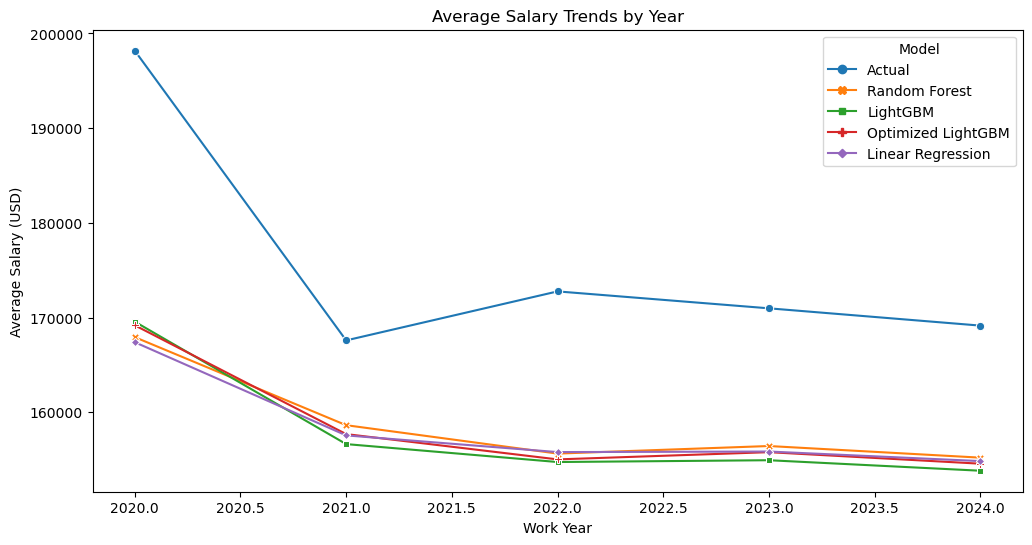

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
y_test_actual = np.expm1(y_test)

results_df = pd.DataFrame({
    "Actual": y_test_actual,
    "Random Forest": y_pred_rf_actual,
    "LightGBM": y_pred_lgb_actual,
    "Optimized LightGBM": y_pred_lgb_optimized_actual,
    "Linear Regression": y_pred_lr_actual  
})


results_df["work_year"] = X_test["work_year"].reset_index(drop=True)
average_salary_by_year = results_df.groupby("work_year").mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_salary_by_year, markers=True, dashes=False)
plt.title("Average Salary Trends by Year")
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.legend(title="Model")
plt.show()